<a href="https://colab.research.google.com/github/Shubham-Saxena-16/pnw/blob/main/Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next Word Prediction using NLTK

#### Basic Setup

In [ ]:
!pip install nltk

import nltk
from nltk.corpus import reuters
from nltk import bigrams, ConditionalFreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
# download nltk corpus (one time only)
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

#### Loading the dataset

In [ ]:
nltk.download("reuters")
corpus = reuters.sents()

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


**The dataset or corpus is represented as a list of sentences (which themselves are a list of words).**

In [ ]:
print(type(corpus))

<class 'nltk.corpus.reader.util.ConcatenatedCorpusView'>


In [ ]:
print(str(corpus))

[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]


In [ ]:
print(corpus[0])

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.']


In [ ]:
len(corpus)

54716

#### Creating Bigrams
**Sentence**: This is a Data Science Course<br>
**UniGram**:
* This
* is
* a
* Data
* Science
* Course

**BiGram**:
* This is
* is a
* a Data
* Data Science
* Science Course

**TriGram**:
* This is a
* is a Data
* a Data Science
* Data Science Course

In [ ]:
words = [each_word.lower() for each_sentence in corpus for each_word in each_sentence]
bigrams_list = list(bigrams(words))

In [ ]:
print(bigrams_list[:10])

[('asian', 'exporters'), ('exporters', 'fear'), ('fear', 'damage'), ('damage', 'from'), ('from', 'u'), ('u', '.'), ('.', 's'), ('s', '.-'), ('.-', 'japan'), ('japan', 'rift')]


#### Creating Conditional Frequency Distribution

In [ ]:
cfd = ConditionalFreqDist(bigrams_list)

In [ ]:
cfd['the']
# ('the', 'company') -> 3126 times in the entire bigrams list
# ('the', 'u') -> 2264 times in the entire bigrams list
# ('the', 'dollar') -> 984 times in the entire bigrams list
# ('the', 'bank') -> 960 times in the entire bigrams list
# ('the', 'first') -> 839 times in the entire bigrams list

FreqDist({'company': 3126, 'u': 2264, 'dollar': 984, 'bank': 960, 'first': 839, 'government': 787, 'year': 720, 'united': 682, 'new': 678, 'market': 590, ...})

#### Predicting Next Word

In [ ]:
def predict_next_word(input_word):
    input_word = input_word.lower()
    if input_word in cfd:
        return cfd[input_word].max()
    else:
        return "Word not found in corpus"

In [ ]:
input_word = "the"
next_word = predict_next_word(input_word)
print(f"The next word after '{input_word}' could be: {next_word}")

The next word after 'the' could be: company


# Next Word Prediction using RNNs

Before we start: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)

#### An LSTM Cell

How a Neuron remembers the relevant past
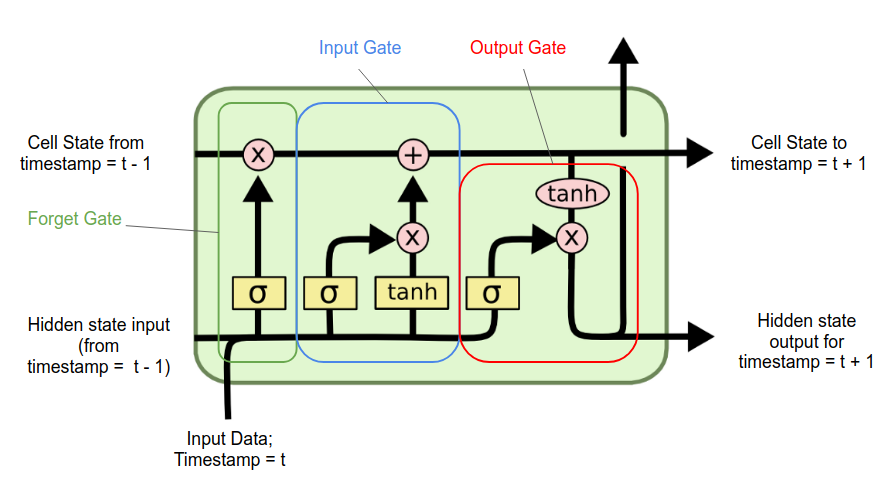
<br>
An LSTM cell is like a tiny memory unit inside a computer program. It has three main parts:

* Input Gate: Think of this as a gatekeeper. It decides which new information to let in from the current input and whether to remember it or not.

* Forget Gate: This part helps the LSTM cell decide what information to forget from its previous memory. It's like cleaning out unnecessary stuff to make room for new things.

* Output Gate: This gate decides what information the LSTM cell should pass on to the next step in the sequence. It's like the LSTM cell deciding what to say or remember.

The cell has two states Cell State and Hidden State. They are continuously updated and carry the information from the previous to the current time steps.

The cell state is the “long-term” memory, while the hidden state is the “short-term” memory.

The forget gate and input gate update the cell state. <br>
The hidden state is computed using the output gate.

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def lstm_cell_explained(prev_c, prev_h, x_t, params):
    """
    LSTM cell implementation.

    Args:
    prev_c: Previous cell state (numpy array of shape (hidden_size,))
    prev_h: Previous hidden state (numpy array of shape (hidden_size,))
    x_t: Input at time step t (numpy array of shape (input_size,))
    params: Dictionary containing LSTM parameters - {'W_f', 'U_f', 'b_f', 'W_i', 'U_i', 'b_i', 'W_c', 'U_c', 'b_c', 'W_o', 'U_o', 'b_o'}

    Returns:
    next_c: Next cell state (numpy array of shape (hidden_size,))
    next_h: Next hidden state (numpy array of shape (hidden_size,))
    """


    W_f, U_f, b_f = params['W_f'], params['U_f'], params['b_f']
    W_i, U_i, b_i = params['W_i'], params['U_i'], params['b_i']
    W_c, U_c, b_c = params['W_c'], params['U_c'], params['b_c']
    W_o, U_o, b_o = params['W_o'], params['U_o'], params['b_o']

    # Input gate
    i_t = sigmoid(np.dot(prev_h, U_i) + np.dot(x_t, W_i) + b_i)

    # Forget gate
    f_t = sigmoid(np.dot(prev_h, U_f) + np.dot(x_t, W_f) + b_f)

    # Output gate
    o_t = sigmoid(np.dot(prev_h, U_o) + np.dot(x_t, W_o) + b_o)

    # Cell state
    c_t = np.tanh(np.dot(prev_h, U_c) + np.dot(x_t, W_c) + b_c)

    # Update cell state
    next_c = f_t * prev_c + i_t * c_t

    # Update hidden state
    next_h = o_t * np.tanh(next_c)

    return next_c, next_h

#### Basic Setup

In [ ]:
import tensorflow as tf
import numpy as np
import random
import sys
import os

#### Loading the dataset

In [ ]:
# Load and preprocess the Shakespeare text
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

1115394/1115394 [==============================] - 0s 0us/step


#### Creating mappings

In [ ]:
# Create a vocabulary
vocab = sorted(set(text))

# Create a mapping from characters to unique indices
char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = np.array(vocab)

# Convert the text to numerical data
text_as_int = np.array([char2idx[char] for char in text])

In [ ]:
print(vocab)
print(len(vocab))

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
65


In [ ]:
print(char2idx)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


In [ ]:
print(idx2char)

['\n' ' ' '!' '$' '&' "'" ',' '-' '.' '3' ':' ';' '?' 'A' 'B' 'C' 'D' 'E'
 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W'
 'X' 'Y' 'Z' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [ ]:
print(text_as_int[0:200])

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59  1 39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39
 58 46 43 56  1 58 53  1 42 47 43  1 58 46 39 52  1 58 53  1 44 39 51 47
 57 46 12  0  0 13 50 50 10  0 30 43 57 53 50 60 43 42  8  1 56 43 57 53
 50 60 43 42  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 18 47
 56 57 58  6  1 63 53 59]


#### Creating Training Batches

In [ ]:
# Create training examples and targets
sequence_length = 100
sequences_per_epoch = len(text) // (sequence_length + 1)
print(sequences_per_epoch)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
# Printing tensor slices
counter = 0
print("Individual characters converted to Tensors")
for chars in char_dataset:
  counter = counter + 1
  print(chars)
  if counter == 10:
    break

# Printing character batches
sequences = char_dataset.batch(sequence_length + 1, drop_remainder=True)

counter = 0
for seqs in sequences:
  counter = counter + 1
  print(seqs)
  if counter == 5:
    break

def split_input_target(chunk):
    input_text = chunk[:-1]
    print(input_text)
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

11043
Individual characters converted to Tensors
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(47, shape=(), dtype=int64)
tf.Tensor(56, shape=(), dtype=int64)
tf.Tensor(57, shape=(), dtype=int64)
tf.Tensor(58, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(47, shape=(), dtype=int64)
tf.Tensor(58, shape=(), dtype=int64)
tf.Tensor(47, shape=(), dtype=int64)
tf.Tensor(
[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59  1], shape=(101,), dtype=int64)
tf.Tensor(
[39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39 58 46 43 56  1
 58 53  1 42 47 43  1 58 46 39 52  1 58 53  1 44 39 51 47 57 46 12  0  0
 13 50 50 10  0 30 43 57 53 50 60 43 42  8  1 56 43 57 53 50 60 43 42  8
  0 

#### Training Parameters

In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

EPOCHS = 30

#### Creating the Model

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
        tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

model = build_model(vocab_size, embedding_dim, rnn_units, BATCH_SIZE)

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

# Configure checkpoints
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           16640     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 65)            66625     
                                                                 
Total params: 5330241 (20.33 MB)
Trainable params: 5330241 (20.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Training the Model

In [ ]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/30
172/172 [==============================] - 27s 91ms/step - loss: 2.5851
Epoch 2/30
172/172 [==============================] - 15s 72ms/step - loss: 1.8703
Epoch 3/30
172/172 [==============================] - 15s 74ms/step - loss: 1.6241
Epoch 4/30
172/172 [==============================] - 16s 74ms/step - loss: 1.4922
Epoch 5/30
172/172 [==============================] - 15s 76ms/step - loss: 1.4149
Epoch 6/30
172/172 [==============================] - 15s 77ms/step - loss: 1.3591
Epoch 7/30
172/172 [==============================] - 15s 78ms/step - loss: 1.3159
Epoch 8/30
172/172 [==============================] - 15s 78ms/step - loss: 1.2766
Epoch 9/30
172/172 [==============================] - 16s 76ms/step - loss: 1.2402
Epoch 10/30
172/172 [==============================] - 15s 76ms/step - loss: 1.2049
Epoch 11/30
172/172 [==============================] - 15s 77ms/step - loss: 1.1697
Epoch 12/30
172/172 [==============================] - 15s 77ms/step - loss: 1.1324
E

#### Predicting with the Model

In [ ]:
# Generate text
def generate_text(model, start_string):
    num_generate = 1000
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    temperature = 1.0

    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

# Restore the latest checkpoint and generate text
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: Be merrol,
Spit in her brethren Richmond and Petruchio.

CAMILLO:
I thank you, lads. Pover Gloucester's dead!

QUEEN ELIZABETH:
Harpon, amisad, fetch I look pale,
Which we heard here a dream to princely name,
In earth against the traff my meditation,
Ant of what thou hast spoken worse,
The fresh sinks papuled in despite of me.

KING RICHARD II:
Well, I just company, I think IVER:
What else? be but true, he deserved, your son,
Go together with this earth and credutish
det redemption! while the old weeds,
The fatal blood is sit in them,
By her force and victory.
But my heart prepare for Talk'd?

GLOUCESTER:
What, more than I, or'th, I will dry
you must return before your grace to pluch them all,
That bear the shadow dry our traded head to the wind;
Who, or thy warlike state, my Lord Noble Marcius, that will say From your country's father.

BIANCA:
Why, since the king shall be contented
Upon the people: is't most rich in remedy and am I servant;
Or sweetle yours, ladies, Lancaster.

# Next Word Prediction using Transformers

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this Data Science course, we will teach you to")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this Data Science course, we will teach you to apply data science principles and methods to an industry with wide reach. It will offer practical solutions for information security problems, enterprise data services, and new technologies for the large and small businesses. The course'}]

In [ ]:
!pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"  # You can also try "gpt2-medium", "gpt2-large", or "gpt2-xl" for larger models
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set the model to evaluation mode (no training)
model.eval()

# Function to generate text
def generate_text(prompt, max_length=50, temperature=0.7):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    print("INPUT=======", input_ids)

    # Generate text/number equivalents
    output = model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        temperature=temperature,
    )
    print("OUTPUT======", output)

    # Decode and return generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

In [ ]:
# Generate text with a prompt
prompt = "Once upon a time"
generated_text = generate_text(prompt, max_length=100)
print(generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


INPUT======= tensor([[7454, 2402,  257,  640]])
OUTPUT====== tensor([[ 7454,  2402,   257,   640,    11,   262,   995,   373,   257,  1295,
           286,  1049,  8737,   290,  1049,  3514,    13,   383,   995,   286,
           262, 11858,   373,   262,  1295,   810,   262,  1049, 11858,   547,
          4642,    11,   290,   810,   484,   547,   284,  2107,    13,   198,
           198,   464,   995,   326,   373,  2727,   373,   407,   262,   976,
           355,   262,   530,   326,   318,   783,    13,   632,   373,   281,
         13079,    11, 13079,   995,    13,   843,   262, 15391,   547,   407,
          4642,   286,  2147,    13,  1119,   547,  2727,   286,   257,  2060,
            11,  2060,  1517,    13,  1320,   373,  1521,   262,  6881,   373,
           523,  4950,    13,  4362,   262, 39385,   373,   925,   286,   734]])
Once upon a time, the world was a place of great beauty and great danger. The world of the gods was the place where the great gods were born, and w